## Contexte du projet


Contexte du projet
Vous ne révez plus... vous venez de faire le plein de ressources... Aujourd'hui vous allez créer votre premier labyrinthe !!
Un labyrinthe est un ensemble complexe de chemins tortueux, à embranchements multiples, dans lequel on peut tourner en rond et se perdre. Il existe un point d’entrée et aussi une issue qu’il convient d’atteindre, cette dernière pouvant être confondue avec le point d’entrée. On peut aussi placer en un certain endroit un objet qu’il s’agit d’atteindre. Dans tous les cas, on doit trouver un moyen d’explorer le labyrinthe en passant partout de façon systématique, du moins jusqu’à l’issue finale, en évitant de refaire plusieurs fois le même chemin ou de tourner en rond. Pour s’en sortir, on connaît le fil d’Ariane, les cailloux disposés sur son chemin par le Petit Poucet, ou la stratégie qui consiste à toujours longer les murs que l’on a à sa droite (ou à sa gauche si l’on préfère). Mais tout cela demande à être précisé.

Le but de ce projet est de créer un code python qui va générer aléatoirement des grilles de labyrinthe, qui va être capable de trouver la solution de celles-ci, si elle existe (eh oui, il se peut qu'un labyrinthe soit insoluble!), et qui pourra afficher tout ça sous la forme d’une image !

On a appris à parcourir un arbre, en choisissant par exemple d’aller à droite lorsque plusieurs bifurcations se présentent, et en faisant demi-tour lorsqu’on atteint une feuille de l’arbre. Pour résoudre un labyrinthe, l’approche est similaire. Pour cela considérons un objet mobile en forme de carré, caractérisé par sa position (x, y) et dirigé dans une certaine direction, celle qu’il a devant lui. A partir de cette direction, l’objet mobile peut soit garder cette direction, soit faire un quart de tour à droite, soit faire un quart de tour à gauche, soit faire demi-tour. Pour respecter les conditions de l’exploration, il va privilégier de tourner à droite, mais s’il tombe sur un mur, il choisira d’aller devant, et s’il tombe encore sur un mur, il ira à gauche. Enfin, s’il tombe sur un cul-de-sac, il fera demi-tour.

« Dans le labyrinthe, tu ne te perds pas... tu te retrouves »

## Livrables 

Créer une application permettant de générer de manière aléatoire un labyrinthe (l’utilisateur pourra décider de la taille du labyrinthe généré, par exemple 10x10 ou 50x100) et permettant également de résoudre le labyrinthe.

## Représentation du graphe avec Python

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

# Partie 1 :

In [30]:
Graphe_ = { }
Graphe_['A']= {'B': 2,'C':1}
Graphe_['B']= {'A': 2,'C':2,'D': 1,'E':3}
Graphe_['C']= {'A': 1,'B':2, 'D': 4,'E':3 , 'F':5}
Graphe_['D']= {'B': 1 , 'C': 4,'E':3 , 'F':6 , 'G':5}
Graphe_['E']= {'B': 3 , 'C': 3,'D':3 , 'F': 1}
Graphe_['F']= {'C': 5 , 'D': 6,'E':1 , 'G': 2}
Graphe_['G']= {'D': 5,'F': 2 }
Graphe_



{'A': {'B': 2, 'C': 1},
 'B': {'A': 2, 'C': 2, 'D': 1, 'E': 3},
 'C': {'A': 1, 'B': 2, 'D': 4, 'E': 3, 'F': 5},
 'D': {'B': 1, 'C': 4, 'E': 3, 'F': 6, 'G': 5},
 'E': {'B': 3, 'C': 3, 'D': 3, 'F': 1},
 'F': {'C': 5, 'D': 6, 'E': 1, 'G': 2},
 'G': {'D': 5, 'F': 2}}

## 1.1 Suivant le graphe (Graphe_) définit précédemment, écrire les fonctions permettant de parcourir tous les nœuds de ce graphe, décrire ce que fait réellement votre fonction.

In [31]:
def ParcourirG(G):
    for noeud in G.keys():
        print (noeud , ":", G[noeud] )
    
ParcourirG(Graphe_)
#Cette fonction permet à l'aide de la boucle for de parcourir chaque noeud et d'afficher les coordonnées de 
#chaque noeud

A : {'B': 2, 'C': 1}
B : {'A': 2, 'C': 2, 'D': 1, 'E': 3}
C : {'A': 1, 'B': 2, 'D': 4, 'E': 3, 'F': 5}
D : {'B': 1, 'C': 4, 'E': 3, 'F': 6, 'G': 5}
E : {'B': 3, 'C': 3, 'D': 3, 'F': 1}
F : {'C': 5, 'D': 6, 'E': 1, 'G': 2}
G : {'D': 5, 'F': 2}


## 1.2 Trouver deux manières de parcourir un graphe de A à G. Quelle est la longueur de votre parcours?

In [2]:
G = dict()
G['a'] = ['b','c']
G['b'] = ['a','d','e']
G['c'] = ['a','d']
G['d'] = ['b','c','e']
G['e'] = ['b','d','f','g']
G['f'] = ['e','g']
G['g'] = ['e','f','h']
G['h'] = ['g']

In [29]:
# parcourir les noeuds et afficher les values
def ParcourirG(G):
    for noeud in G.keys():
        print (noeud , ":", G[noeud] )
    
ParcourirG(G)



a : ['b', 'c']
b : ['a', 'd', 'e']
c : ['a', 'd']
d : ['b', 'c', 'e']
e : ['b', 'd', 'f', 'g']
f : ['e', 'g']
g : ['e', 'f', 'h']
h : ['g']


In [ ]:
#exploration en profondeur
Explore_sommets = []

def

In [3]:
#fonction qui permet de parcourir le graphe en largeur 

def bfs(G,s):
    couleur = dict()
    for x in G : couleur [x]='blanc'
    P=dict()
    P[s]=None
    couleur[s]='gris'
    Q=[s]
    while Q :
        u= Q[0]
        for v in G[u] :
            if couleur[v]=='blanc':
                P[v]=u
                couleur[v]='gris'
                Q.append(v)
        Q.pop(0)
        couleur[u]='noir'
    return P
    

In [12]:
#fonction qui permet de parcourir le graphe en profondeur
def dfs(s) :
    P,Q={s :None},[s]
    while Q :
        u = Q[-1]
        R=[y for y in voisinage(u) if y not in P]
       
        if R :
            v=random.choice(R)
            P[v]=u
            Q.append(v)
        else :
            Q.pop()
    return P

In [13]:
def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    
    i, j = couple[0], couple[1]
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
        
    return listeVoisins


In [17]:
# Trouver un chemin dans le labyrinthe
def find_path(graph, start, end, path=[]): 
    path = path + [start] 
    if start == end: 
        return path 
    for node in graph[start]: 
        if node not in path: 
            newpath = find_path(graph, node, end, path) 
            if newpath: 
                return newpath

## Application à la création d'un labyrinthe

In [18]:
# Imprimer le labyrinthe
def printLay (labyrinthe):
    plt.imshow(labyrinthe)
     # on cache les graduations:
    plt.xticks([])
    plt.yticks([])
     # on visualise le résultat:
    plt.show()
     #print(labyrinthe)

# une fonction qui permet de convertir le parcous récupéré par dfs

def convDic (d):
    dic_new = {}
    for i in d.keys():
        dic_new[i] = [d[i]]
        if d[i] in dic_new.keys():
            dic_new[d.get(i)].append(i)
    for i in d.keys():
        dic_new[i] = {node : 1 for node in dic_new[i] if node != None }
    return dic_new

# une fonction qui permet de colorier le chemin
def ColerPath (parcours, path): 
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)] 
    
    #print(parcours)
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 3
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 3
            labyrinthe[i+k+1][j+l+1] = 3
            
    for (i,j) in path:
        labyrinthe[2*i+1][2*j+1] = 5
        #if (i,j) in path: 
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 5
            labyrinthe[i+k+1][j+l+1] = 5
    labyrinthe[1][0] = 2
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 5
    return labyrinthe

In [19]:
#Visualisation du graphe avec networkx
def visNx (dic):
    g = nx.Graph()
    for i, j in dic.items():
        for k in j:
            g.add_edge( i,k )
    f, ax = plt.subplots(figsize=(10,5))
    nx.draw(g, ax = ax, with_labels=True, font_weight='bold')


Visualisation labyrinthe  Hauteur: 12 Largeur: 8


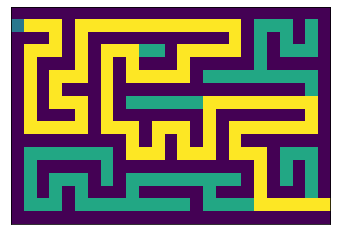

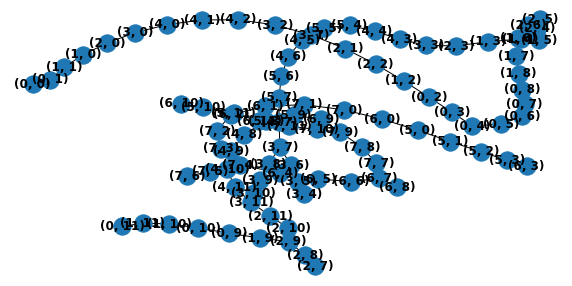

In [20]:
# Dimensions de la grille:
LARGEUR = 12
HAUTEUR = 8

print(f"Visualisation labyrinthe  Hauteur: {LARGEUR} Largeur: {HAUTEUR}")
dic = {(0,0) : None}

parcours = dfs((0,0))

dic = convDic (parcours)

path=find_path(dic, (0, 0), (HAUTEUR-1,LARGEUR-1))

labyrinthe = ColerPath (parcours, path)

printLay (labyrinthe)

visNx (dic)

In [8]:
import random
import matplotlib.pyplot as plt


class Maillon:

    def __init__(self, valeur, suivant=None):
        self.valeur = valeur
        self.suivant = suivant



class Pile:

    def __init__(self):
        self.taille = 0 # nombre d'assiettes dans la pile
        self.sommet = None


    def empiler(self, valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1

    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet = self.sommet.suivant
            self.taille -= 1
            return valeur

    def estVide(self):
        return self.taille == 0


    def lireSommet(self):
        return self.sommet.valeur



# Dimensions de la grille:
LARGEUR = 20
HAUTEUR = 15




In [21]:
#Visualisation du graphe avec networkx
def visNx (dic):
    g = nx.Graph()
    for i, j in dic.items():
        for k in j:
            g.add_edge( i,k )
    f, ax = plt.subplots(figsize=(10,5))
    nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

Visualisation labyrinthe  Hauteur: 12 Largeur: 8


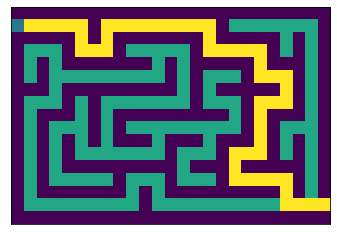

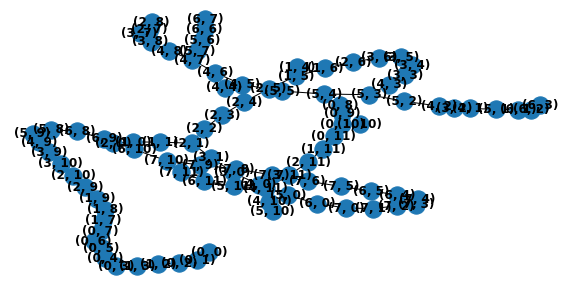

In [22]:
# Dimensions de la grille:
LARGEUR = 12
HAUTEUR = 8

print(f"Visualisation labyrinthe  Hauteur: {LARGEUR} Largeur: {HAUTEUR}")
dic = {(0,0) : None}

parcours = dfs((0,0))

dic = convDic (parcours)

path=find_path(dic, (0, 0), (HAUTEUR-1,LARGEUR-1))

labyrinthe = ColerPath (parcours, path)

printLay (labyrinthe)

visNx (dic)

In [23]:
# function to generate all possible paths 
def find_all_paths(graph, start, end, path =[]): 
    path = path + [start] 
    if start == end: 
        return [path] 
    paths = [] 
    
    for node in graph[start]: 
        if node not in path: 
            newpaths = find_all_paths(graph, node, end, path) 
            for newpath in newpaths: 
                paths.append(newpath) 
            return paths

In [24]:
dic1 = {(0, 0): {(0, 1), 1},
 (0, 1): {(0, 0): 1, (1, 1): 1},
 (1, 1): {(0, 1): 1, (1, 2): 1, (1, 0): 1},
 (1, 2): {(1, 1): 1, (0, 2): 1, (1, 0) : 1},
 (0, 2): {(1, 2): 1, (0, 3): 1},
 (0, 3): {(0, 2): 1, (0, 1): 1, (0, 4): 1},
 (0, 4): {(0, 3): 1, (1, 4): 1},
 (1, 4): {(0, 4): 1, (1, 3): 1},
 (1, 3): {(1, 4): 1},
 (1, 0): {(1, 1): 1}}

In [ ]:
paths = find_all_paths(dic1, (0,0), (1,4))
paths

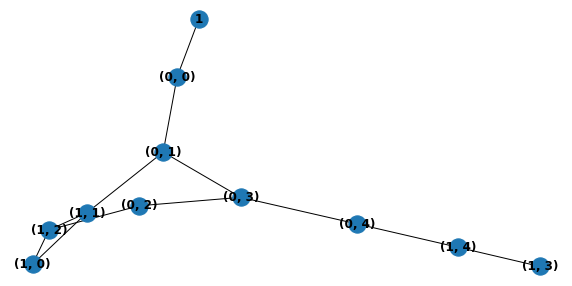

In [25]:
visNx (dic1)

In [26]:
print(find_all_paths(dic, (0, 0), (0,3)))


[[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (0, 3)]]
